<a href="https://colab.research.google.com/github/iris-kurapaty/CodingPractice/blob/main/Step1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
pwd

'/content'

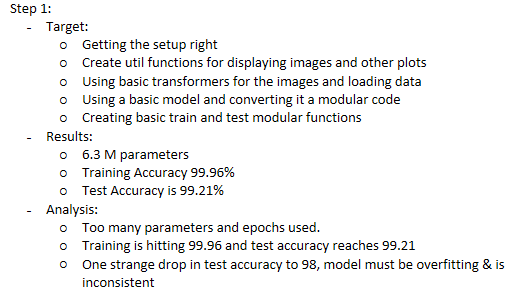

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from tqdm import tqdm
from model import *
from utils import *

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train_data = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_data, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Data Statistics

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([128, 1, 28, 28])
torch.Size([128])


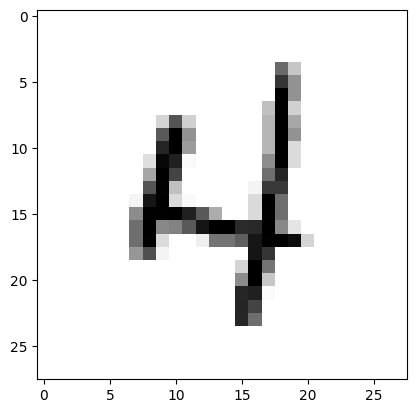

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_set = train_data.train_data
train_set = train_data.transform(train_set.numpy())

print('[Train]')
print(' - Numpy Shape:', train_data.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train_data.train_data.size())
print(' - min:', torch.min(train_set))
print(' - max:', torch.max(train_set))
print(' - mean:', torch.mean(train_set))
print(' - std:', torch.std(train_set))
print(' - var:', torch.var(train_set))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')


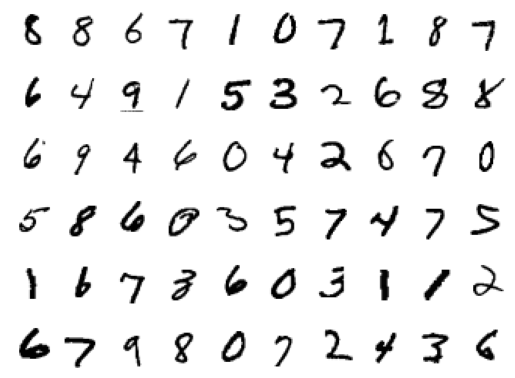

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# The model
Let's start with the model we first saw

# Model Params

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_summary(Net1, device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
            Conv2d-2           [-1, 64, 28, 28]          18,496
         MaxPool2d-3           [-1, 64, 14, 14]               0
            Conv2d-4          [-1, 128, 14, 14]          73,856
            Conv2d-5          [-1, 256, 14, 14]         295,168
         MaxPool2d-6            [-1, 256, 7, 7]               0
            Conv2d-7            [-1, 512, 5, 5]       1,180,160
            Conv2d-8           [-1, 1024, 3, 3]       4,719,616
            Conv2d-9             [-1, 10, 1, 1]          92,170
Total params: 6,379,786
Trainable params: 6,379,786
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.51
Params size (MB): 24.34
Estimated Total Size (MB): 25.85
-------------------------------------

# Training and Testing


In [ ]:
train_losses_t = []
test_losses_t = []
train_acc_t = []
test_acc_t = []

# Let's Train and test our model

In [ ]:
model =  Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses, train_acc = train(model, device, train_loader, optimizer, epoch)
    train_losses_t += train_losses
    train_acc_t.append(train_acc)
    test_losses, test_acc = test(model, device, test_loader)
    test_losses_t += test_losses
    test_acc_t.append(test_acc)

EPOCH: 0


Loss=0.04650087654590607 Batch_id=468 Accuracy=88.06: 100%|██████████| 469/469 [00:23<00:00, 20.18it/s]



Test set: Average loss: 0.0655, Accuracy: 9793/10000 (97.93%)

EPOCH: 1


Loss=0.022075733169913292 Batch_id=468 Accuracy=98.38: 100%|██████████| 469/469 [00:27<00:00, 17.15it/s]



Test set: Average loss: 0.0359, Accuracy: 9873/10000 (98.73%)

EPOCH: 2


Loss=0.048338357359170914 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]



Test set: Average loss: 0.0329, Accuracy: 9889/10000 (98.89%)

EPOCH: 3


Loss=0.006410046946257353 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:22<00:00, 20.66it/s]



Test set: Average loss: 0.0306, Accuracy: 9905/10000 (99.05%)

EPOCH: 4


Loss=0.00883494596928358 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:22<00:00, 21.23it/s]



Test set: Average loss: 0.0283, Accuracy: 9905/10000 (99.05%)

EPOCH: 5


Loss=0.008803583681583405 Batch_id=468 Accuracy=99.54: 100%|██████████| 469/469 [00:22<00:00, 20.75it/s]



Test set: Average loss: 0.0291, Accuracy: 9903/10000 (99.03%)

EPOCH: 6


Loss=0.04424334689974785 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:23<00:00, 20.26it/s]



Test set: Average loss: 0.0270, Accuracy: 9918/10000 (99.18%)

EPOCH: 7


Loss=0.006458983290940523 Batch_id=468 Accuracy=99.75: 100%|██████████| 469/469 [00:24<00:00, 19.43it/s]



Test set: Average loss: 0.0287, Accuracy: 9917/10000 (99.17%)

EPOCH: 8


Loss=0.00243087625131011 Batch_id=468 Accuracy=99.75: 100%|██████████| 469/469 [00:23<00:00, 19.63it/s]



Test set: Average loss: 0.0290, Accuracy: 9915/10000 (99.15%)

EPOCH: 9


Loss=0.0014263290213420987 Batch_id=468 Accuracy=99.86: 100%|██████████| 469/469 [00:25<00:00, 18.41it/s]



Test set: Average loss: 0.0298, Accuracy: 9921/10000 (99.21%)

EPOCH: 10


Loss=0.0020042189862579107 Batch_id=468 Accuracy=99.84: 100%|██████████| 469/469 [00:23<00:00, 19.56it/s]



Test set: Average loss: 0.0285, Accuracy: 9918/10000 (99.18%)

EPOCH: 11


Loss=0.0005788790294900537 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:25<00:00, 18.35it/s]



Test set: Average loss: 0.0343, Accuracy: 9915/10000 (99.15%)

EPOCH: 12


Loss=7.826310320524499e-05 Batch_id=468 Accuracy=99.92: 100%|██████████| 469/469 [00:23<00:00, 20.18it/s]



Test set: Average loss: 0.0315, Accuracy: 9920/10000 (99.20%)

EPOCH: 13


Loss=0.0011126055615022779 Batch_id=468 Accuracy=99.96: 100%|██████████| 469/469 [00:22<00:00, 20.71it/s]



Test set: Average loss: 0.0488, Accuracy: 9896/10000 (98.96%)

EPOCH: 14


Loss=5.627285190712428e-06 Batch_id=468 Accuracy=99.89: 100%|██████████| 469/469 [00:22<00:00, 20.47it/s]



Test set: Average loss: 0.0339, Accuracy: 9919/10000 (99.19%)



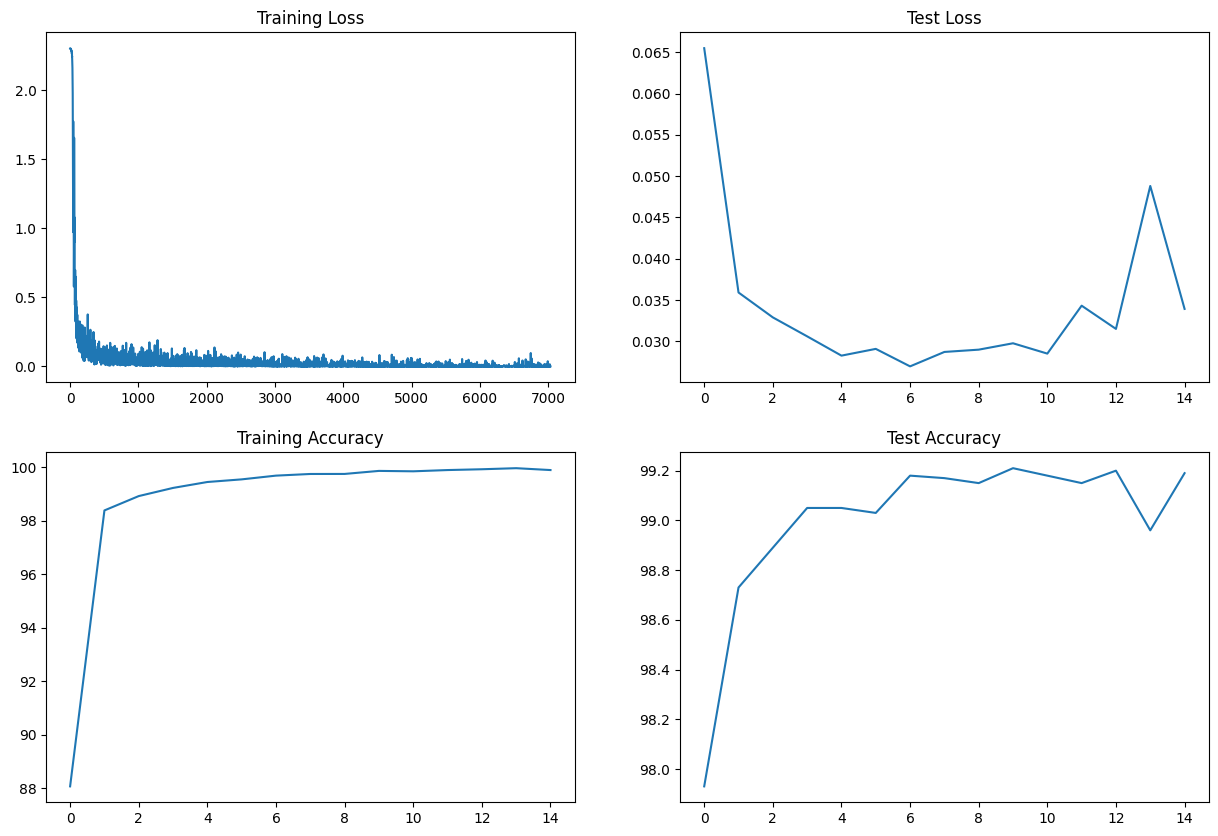

In [ ]:
plot_loss_acc(train_losses_t, train_acc_t, test_losses_t, test_acc_t)